In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
BASE_DIR = './dataset/'
train = pd.read_csv(f'{BASE_DIR}train.csv')
print(f"Shape:{train.shape}")
train.head()

Shape:(404290, 6)


,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


<AxesSubplot:xlabel='is_duplicate'>

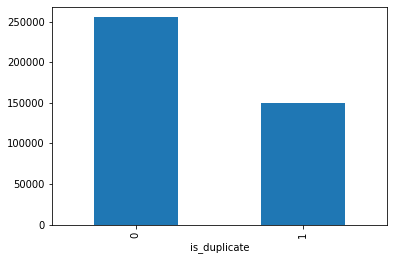

In [5]:
train.groupby("is_duplicate")['id'].count().plot.bar()

In [9]:
print(f"Total question pairs : {train.shape[0]}")
print(f"Total % of non duplicate question pairs : {round(train[train.is_duplicate==0].shape[0]/train.shape[0]*100, 2)}")
print(f"Total % of duplicate question pairs : {round(train[train.is_duplicate==1].shape[0]/train.shape[0]*100, 2)}")

Total question pairs : 404290
Total % of non duplicate question pairs : 63.08
Total % of duplicate question pairs : 36.92


In [17]:
question_ids = pd.Series(train.qid1.to_list() + train.qid2.to_list())
unique_questions = len(np.unique(question_ids))
questions_more_than_once = np.sum(question_ids.value_counts() > 1)
max_occurrence = max(question_ids.value_counts())
print(f"Unique questions : {unique_questions}")
print(f"Questions wth occurrence more than once : {questions_more_than_once} ({questions_more_than_once/unique_questions*100}%)")
print(f"Highest frequency of a question : {max_occurrence}")

Unique questions : 537933
Questions wth occurrence more than once : 111780 (20.77953945937505%)
Highest frequency of a question : 157


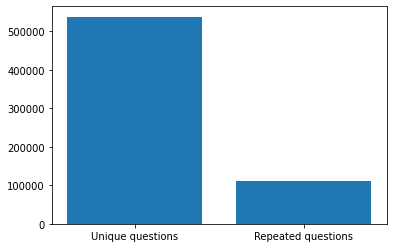

In [21]:
plt.bar(["Unique questions", "Repeated questions"], [unique_questions, questions_more_than_once])
# plt.legend()
# plt.title()
plt.show()

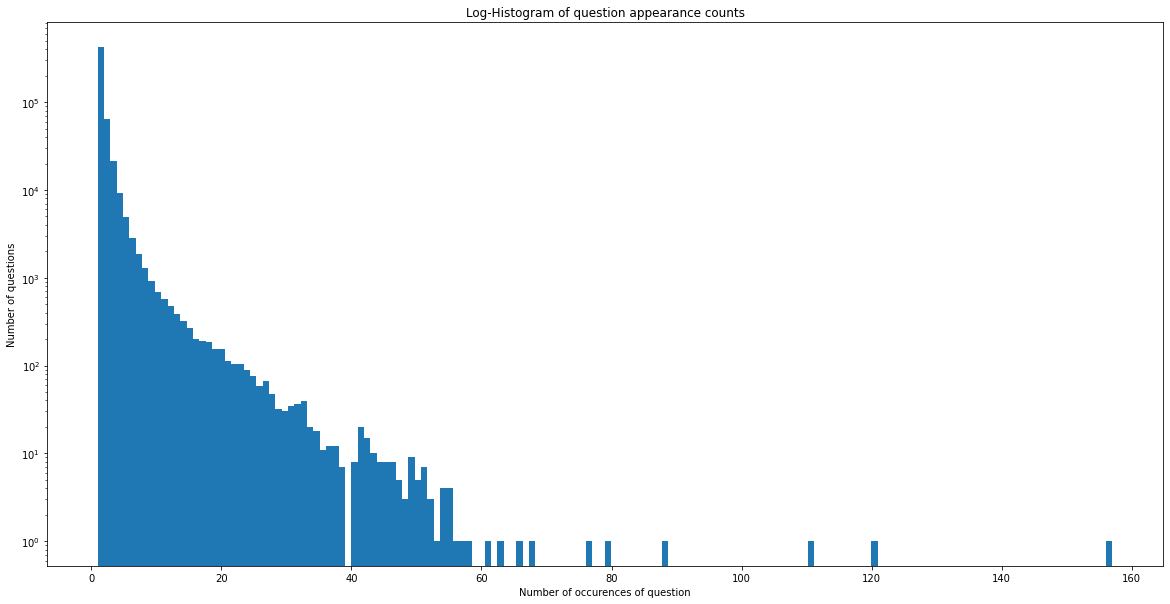

In [27]:
## exactly copied
plt.figure(figsize=(20, 10))
plt.hist(question_ids.value_counts(), bins=160)
plt.yscale('log', nonpositive='clip')
plt.title('Log-Histogram of question appearance counts')
plt.xlabel('Number of occurences of question')
plt.ylabel('Number of questions')
plt.show()


In [32]:
print(f"Number of rows with either one of the questions as Nan: {train[train.isnull().any(1)].shape[0]}")
print(f"% of rows with either one of the questions as Nan: {train[train.isnull().any(1)].shape[0]/train.shape[0]*100}")

Number of rows with either one of the questions as Nan: 3
% of rows with either one of the questions as Nan: 0.000742041603799253


In [ ]:
train.fillna('', inplace=True)

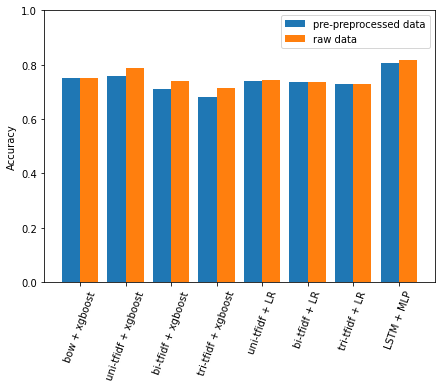

In [42]:
X = [
'bow + xgboost',
'uni-tfidf + xgboost',
'bi-tfidf + xgboost',
'tri-tfidf + xgboost',
'uni-tfidf + LR',
'bi-tfidf + LR',
'tri-tfidf + LR',
'LSTM + MLP'
]
Y = np.array([
0.75,
0.7876,
0.74,
0.714,
0.7438,
0.738,
0.728,
0.817,
])
y_processed = np.array([
0.75,
0.76,
0.71,
0.68,
0.7389,
0.7381,
0.73,
0.807,
])
X_axis = np.arange(len(X))

plt.figure(figsize=(7,5))
plt.bar(X_axis-0.2, y_processed, 0.4, label="pre-preprocessed data")
plt.bar(X_axis+0.2, Y, 0.4, label = "raw data")
plt.xticks(X_axis, X)
plt.ylim(0,1)
plt.xticks(rotation=70)
plt.legend()
plt.ylabel("Accuracy")
plt.show()